In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [2]:
# Tải mô hình MobileNetV2 pretrained trên ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

# Đóng băng các layer ban đầu
base_model.trainable = False


In [3]:
import os
train_dir = r'C:\Users\Doan Quy\Desktop\Project_Final_CV\Train'
test_dir = r'C:\Users\Doan Quy\Desktop\Project_Final_CV\Test'

classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_class = len(classes)
print('Số lượng nhãn',num_class)

Số lượng nhãn 6


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160,160),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(160,160),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  

Found 1467 images belonging to 6 classes.
Found 293 images belonging to 6 classes.


In [5]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)  # num_classes = số người
#Tạo model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#Train
model.fit(train_generator, validation_data=test_generator, epochs=10)

C:\Users\Doan Quy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 43s 858ms/step - accuracy: 0.2388 - loss: 2.1584 - val_accuracy: 0.9181 - val_loss: 0.7036
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step - accuracy: 0.7185 - loss: 0.9067 - val_accuracy: 0.9693 - val_loss: 0.2794
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - accuracy: 0.8849 - loss: 0.4535 - val_accuracy: 0.9863 - val_loss: 0.1572
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.9325 - loss: 0.2746 - val_accuracy: 0.9795 - val_loss: 0.1216
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 322ms/step - accuracy: 0.9468 - loss: 0.2327 - val_accuracy: 0.9795 - val_loss: 0.1027
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - accuracy: 0.9649 - loss: 0.1500 - val_accuracy: 0.9795 - val_loss: 0.0894
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.9753 - loss: 0.1210 - val_accuracy: 0.9795 - val_loss: 0.0723
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 318ms/step - accuracy: 0.9725 - loss: 0.1185 - val_accu

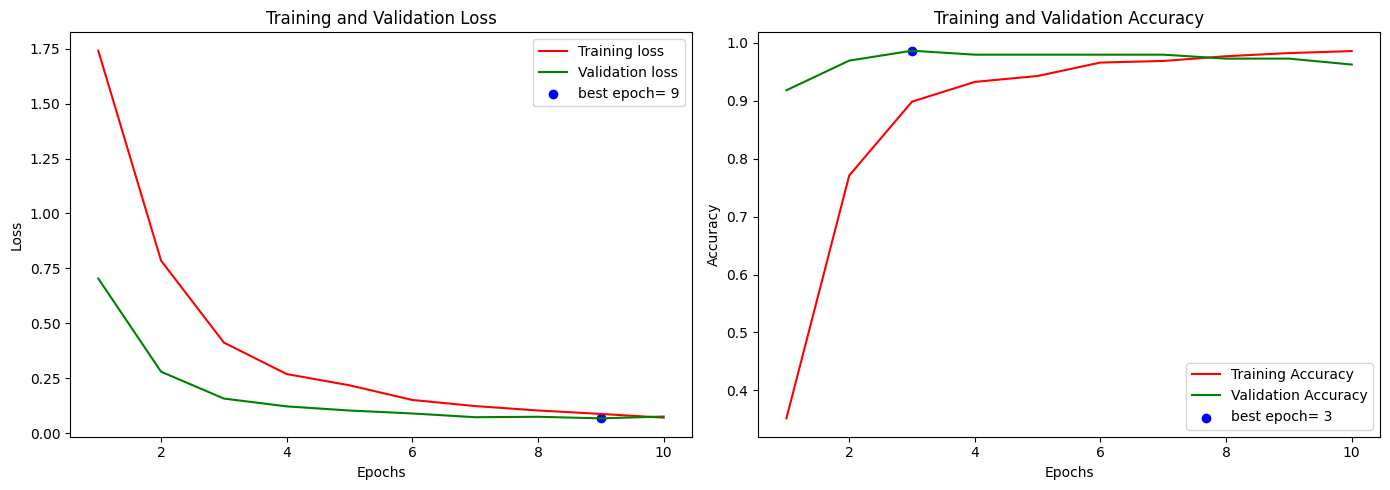

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy dữ liệu từ model.history
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Tìm best epoch
best_epoch_acc = np.argmax(val_acc) + 1
best_epoch_loss = np.argmin(val_loss) + 1

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.scatter(best_epoch_loss, val_loss[best_epoch_loss-1], color='blue', label=f'best epoch= {best_epoch_loss}')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(best_epoch_acc, val_acc[best_epoch_acc-1], color='blue', label=f'best epoch= {best_epoch_acc}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
model.save('face_MobileNet_model_7.h5')  


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt


In [10]:
# Dự đoán trên tập test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Lấy nhãn dự đoán

# Lấy nhãn thật từ generator
y_true = test_generator.classes  # Đã được gán khi load từ flow_from_directory

# Lấy tên các lớp (label → tên người)
class_names = list(test_generator.class_indices.keys())


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step


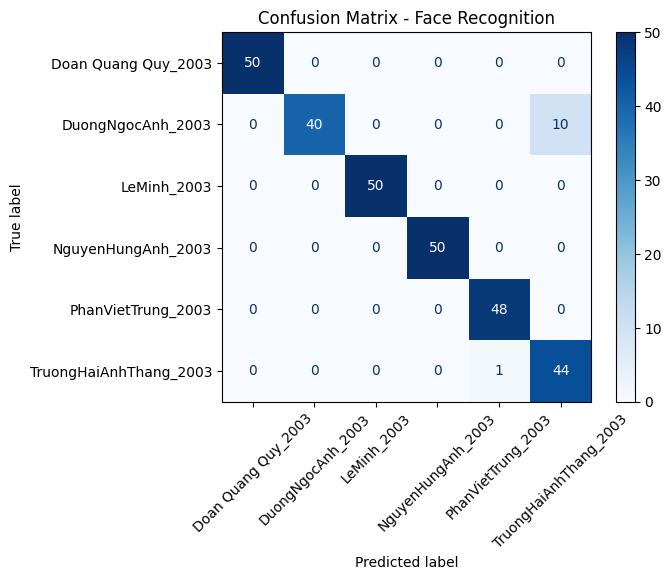

In [11]:
cm = confusion_matrix(y_true, y_pred_classes)

# Hiển thị confusion matrix đẹp
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Face Recognition")
plt.show()


In [12]:
# 🎯 Accuracy
acc = accuracy_score(y_true, y_pred_classes)  # Use y_pred_classes instead of y_pred
print("🎯 Accuracy:", acc)

# 📊 Classification Report
print("\n📊 Classification report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

🎯 Accuracy: 0.962457337883959

📊 Classification report:

                        precision    recall  f1-score   support

   Doan Quang Quy_2003       1.00      1.00      1.00        50
     DuongNgocAnh_2003       1.00      0.80      0.89        50
           LeMinh_2003       1.00      1.00      1.00        50
    NguyenHungAnh_2003       1.00      1.00      1.00        50
    PhanVietTrung_2003       0.98      1.00      0.99        48
TruongHaiAnhThang_2003       0.81      0.98      0.89        45

              accuracy                           0.96       293
             macro avg       0.97      0.96      0.96       293
          weighted avg       0.97      0.96      0.96       293



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Dự đoán: PhanVietTrung_2003
Độ chính xác: 99.90%


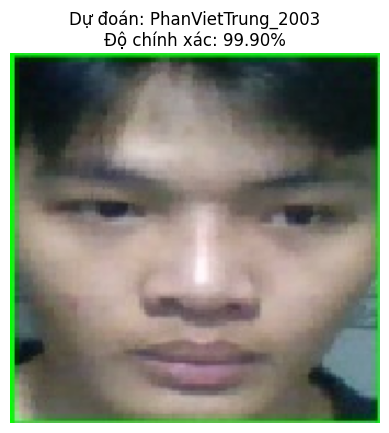

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model đã lưu
model = load_model('face_MobileNet_model_7.h5')

# Load ảnh test
img_path = r'H:\nam4\CV\model_cv\data\Test\PhanVietTrung_2003\PhanVietTrung_2003_7.jpg'
img = image.load_img(img_path, target_size=(160, 160))
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_array_expanded /= 255.0  # chuẩn hóa nếu cần

# Dự đoán
pred = model.predict(img_array_expanded)
pred_class = np.argmax(pred, axis=1)[0]
confidence = np.max(pred) * 100  # phần trăm độ tin cậy

# In kết quả
print("Dự đoán:", class_names[pred_class])
print("Độ chính xác: {:.2f}%".format(confidence))

# Hiển thị ảnh và kết quả
plt.imshow(img)
plt.title(f"Dự đoán: {class_names[pred_class]}\nĐộ chính xác: {confidence:.2f}%")
plt.axis('off')
plt.show()
